# ANALISI QUANTITATIVA:
# Tesla (TSLA) - 7 chiusure negative consecutive
# Rendimento medio +7 giorni e +21 giorni
# Percentuale di esiti positivi


In [1]:
# Installazione librerie (solo la prima volta)
!pip install yfinance pandas numpy

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# -----------------------------
# PARAMETRI
# -----------------------------
ticker = "TSLA"
start_date = "2010-01-01"   # Dalla IPO
streak_length = 6           # Giorni negativi consecutivi (streak_length = 6 means 7 consecutive negative days)
forward_7d = 7
forward_14d = 14            # Circa 2 settimane (14 giorni)
forward_21d = 21
forward_2m = 60             # Circa 2 mesi (60 giorni)

# -----------------------------
# DOWNLOAD DATI
# -----------------------------
df = yf.download(ticker, start=start_date)
df = df[['Close']].dropna()

# -----------------------------
# CALCOLO RENDIMENTI GIORNALIERI
# -----------------------------
df['Return'] = df['Close'].pct_change()
df['Down'] = df['Return'] < 0

# -----------------------------
# IDENTIFICAZIONE EVENTI
# -----------------------------
events = []

for i in range(streak_length, len(df)):
    if df['Down'].iloc[i-streak_length:i].all():
        end_idx = i - 1

        # Verifica disponibilità dati futuri
        if end_idx + forward_2m < len(df):
            price_end = df['Close'].iloc[end_idx]
            price_7d = df['Close'].iloc[end_idx + forward_7d]
            price_14d = df['Close'].iloc[end_idx + forward_14d]
            price_21d = df['Close'].iloc[end_idx + forward_21d]
            price_2m = df['Close'].iloc[end_idx + forward_2m]

            # Extract scalar values from the Series
            ret_7d = ((price_7d - price_end) / price_end).item()
            ret_14d = ((price_14d - price_end) / price_end).item()
            ret_21d = ((price_21d - price_end) / price_end).item()
            ret_2m = ((price_2m - price_end) / price_end).item()

            events.append({
                'End_Date': df.index[end_idx],
                'Return_7d': ret_7d,
                'Return_14d': ret_14d,
                'Return_21d': ret_21d,
                'Return_2m': ret_2m
            })

# -----------------------------
# DATAFRAME EVENTI
# -----------------------------
events_df = pd.DataFrame(events)

# -----------------------------
# STATISTICHE FINALI
# -----------------------------
total_events = len(events_df)

avg_7d = events_df['Return_7d'].mean()
avg_14d = events_df['Return_14d'].mean()
avg_21d = events_df['Return_21d'].mean()
avg_2m = events_df['Return_2m'].mean()

positive_7d_pct = (events_df['Return_7d'] > 0).mean() * 100
positive_14d_pct = (events_df['Return_14d'] > 0).mean() * 100
positive_21d_pct = (events_df['Return_21d'] > 0).mean() * 100
positive_2m_pct = (events_df['Return_2m'] > 0).mean() * 100

summary = pd.DataFrame({
    'Metrica': [
        'Numero totale eventi',
        'Rendimento medio +7 giorni (%)',
        'Rendimento medio +14 giorni (%)',
        'Rendimento medio +21 giorni (%)',
        'Rendimento medio +60 giorni (%)',
        '% eventi positivi +7 giorni',
        '% eventi positivi +14 giorni',
        '% eventi positivi +21 giorni',
        '% eventi positivi +60 giorni'
    ],
    'Valore': [
        total_events,
        round(avg_7d * 100, 2),
        round(avg_14d * 100, 2),
        round(avg_21d * 100, 2),
        round(avg_2m * 100, 2),
        round(positive_7d_pct, 2),
        round(positive_14d_pct, 2),
        round(positive_21d_pct, 2),
        round(positive_2m_pct, 2)
    ]
})

# -----------------------------
# OUTPUT
# -----------------------------
print("\n=== RISULTATI ANALISI TSLA ===\n")
print(summary.to_string(index=False))

print("\nPrime occorrenze eventi:\n")
display(events_df.head())

/tmp/ipython-input-1147438087.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed



=== RISULTATI ANALISI TSLA ===

                        Metrica  Valore
           Numero totale eventi   21.00
 Rendimento medio +7 giorni (%)    5.68
Rendimento medio +14 giorni (%)    9.78
Rendimento medio +21 giorni (%)   17.54
Rendimento medio +60 giorni (%)   32.79
    % eventi positivi +7 giorni   61.90
   % eventi positivi +14 giorni   80.95
   % eventi positivi +21 giorni   76.19
   % eventi positivi +60 giorni   85.71

Prime occorrenze eventi:



,End_Date,Return_7d,Return_14d,Return_21d,Return_2m
0,2011-08-22,0.127107,0.042369,0.177677,0.545786
1,2012-05-18,0.103411,0.091437,0.164369,0.067489
2,2013-01-10,0.049508,0.118700,0.145840,0.207874
3,2013-01-11,0.093892,0.163780,0.151322,0.271954
4,2014-12-05,-0.115775,0.018372,-0.057038,-0.103169


Genera Grafici

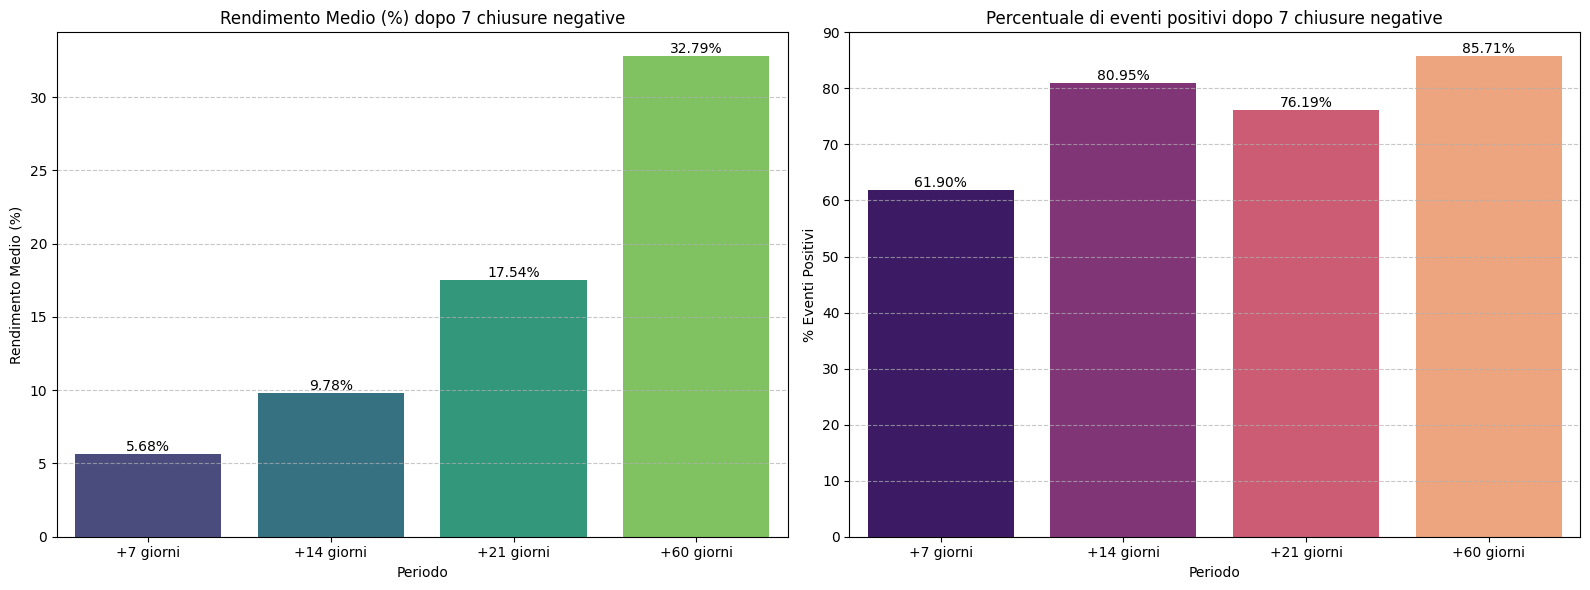

In [4]:

# Prepare data for plotting average returns
avg_returns_data = {
    'Period': ['+7 giorni', '+14 giorni', '+21 giorni', '+60 giorni'],
    'Average Return (%)': [avg_7d * 100, avg_14d * 100, avg_21d * 100, avg_2m * 100]
}
avg_returns_df = pd.DataFrame(avg_returns_data)

# Prepare data for plotting positive event percentages
positive_events_data = {
    'Period': ['+7 giorni', '+14 giorni', '+21 giorni', '+60 giorni'],
    '% Positive Events': [positive_7d_pct, positive_14d_pct, positive_21d_pct, positive_2m_pct]
}
positive_events_df = pd.DataFrame(positive_events_data)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for Average Returns
sns.barplot(x='Period', y='Average Return (%)', data=avg_returns_df, palette='viridis', ax=axes[0], hue='Period', legend=False)
axes[0].set_title('Rendimento Medio (%) dopo 7 chiusure negative')
axes[0].set_xlabel('Periodo')
axes[0].set_ylabel('Rendimento Medio (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for index, row in avg_returns_df.iterrows():
    axes[0].text(index, row['Average Return (%)'], f"{row['Average Return (%)']:.2f}%", color='black', ha="center", va='bottom')

# Bar chart for Percentage of Positive Events
sns.barplot(x='Period', y='% Positive Events', data=positive_events_df, palette='magma', ax=axes[1], hue='Period', legend=False)
axes[1].set_title('Percentuale di eventi positivi dopo 7 chiusure negative')
axes[1].set_xlabel('Periodo')
axes[1].set_ylabel('% Eventi Positivi')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of the bars
for index, row in positive_events_df.iterrows():
    axes[1].text(index, row['% Positive Events'], f"{row['% Positive Events']:.2f}%", color='black', ha="center", va='bottom')

plt.tight_layout()
plt.show()